In [207]:
#Importando librerias 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [208]:
#Leemos los csv necesarios

cancer = pd.read_csv('/Users/rodolfopardo/Documentos/Ironhack/datamex-0719/semana5/lab-pca/your-code/breast-cancer.csv')
ocup = pd.read_csv('data/occupancy.csv')
pstars = pd.read_csv('data/pulsar_stars.csv')

In [209]:
#Eliminamos columnas object de nuestro dataframe

cancer = cancer.drop(columns = ['N', '5.1'])
ocup = ocup.drop(columns = ['date'])
pstars = pstars.drop(columns = ['target_class'])

In [210]:
#Conocemos las dimensiones de nuestro dataframe

print(cancer.shape)
print(ocup.shape)
print(pstars.shape)

(197, 33)
(2664, 6)
(17898, 8)


In [211]:
def normaliza(df): #funcion encargada de normalizar las bases 
    scaler = StandardScaler()
    df = scaler.fit_transform(df)
    return df 

def scale_and_plot(df):  #funcion encargada de escalar y plotear
    pca = PCA()
    pca.fit(df)
    pca.explained_variance_ratio_
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_), )
    plt.xlabel('Numero de componentes')
    plt.ylabel('% de variación')
    plt.ylim([0,1])
    plt.show();
    return df

In [212]:
#Se llaman a las funciones  
ocup_norm = normaliza(ocup)
pstars_norm = normaliza(pstars)
cancer_norm = normaliza(cancer)

In [213]:
#Se llaman a las funciones 
ocup_scale = re_scale(ocup_norm)
pstars_scale = re_scale(pstars_norm)
cancer_scale = re_scale(cancer_nomr)

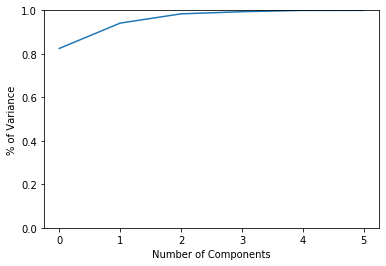

In [214]:
#Comenzamos a estudiar los componentes que pueden o no ser eliminados de nuestro dataframe 

plotear(ocup_scale)

En este gráfico podemos observar que hasta 4 componentes no perdemos datos.

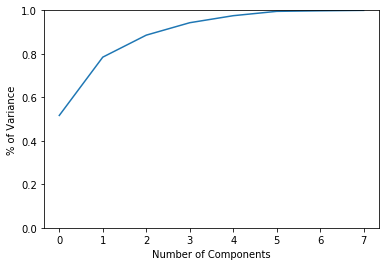

In [215]:
plotear(pstars_scale)

En este gráfico, podemos observar que hasta 5 componentes no perdemos datos.

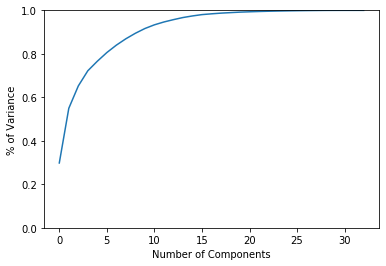

In [216]:
plotear(cancer_scale)

En este gráfico, podemos observar que hasta 20 componentes no se pierden datos de nuestro dataframe.

In [185]:
#Ejecutando PCA en dataframe ocup

pca = PCA(n_components=4)
ocup = pd.DataFrame(pca.fit_transform(ocup_scale))

In [186]:
#Vemos los primeros valores

ocup.head()

,0,1,2,3
0,2.738551,0.934158,1.162847,-0.508716
1,2.760848,0.903007,1.171506,-0.519375
2,2.755592,0.900206,1.189106,-0.525777
3,2.605885,0.749794,1.196634,-0.716264
4,2.645078,0.706934,1.208032,-0.736119


In [187]:
#Vemos su forma final 

ocup.shape

(2664, 4)

#### <font color="red">Pasamos de un dataframe de 6 columnas a 4 columnas con las combinaciones necesarias para no perder datos

In [193]:
#Ejecutando pca con pstars 

pca = PCA(n_components = 6)
pstars = pd.DataFrame(pca.fit_transform(pstars_scale))

In [194]:
#Vemos el head de pstars
pstars.head()

,0,1,2,3,4,5
0,-1.278849,-1.273133,0.016213,0.662102,0.577362,0.100457
1,-1.020553,-0.201162,0.670478,1.605779,-0.390326,0.073633
2,0.188289,0.432114,-0.979766,-0.519232,-0.305346,0.138962
3,-1.015466,-1.469881,-0.018832,0.938386,0.495189,0.074270
4,-0.822626,2.123651,0.407953,-0.380922,-0.654083,0.024105


In [195]:
#Vemos el formato logrado
pstars.shape

(17898, 6)

#### <font color=red>Pasamos de un dataframe de 8 columnas a 6 columnas sin perder ningún dato

In [191]:
#Ejecutamos pca en cancer 

In [196]:
pca = PCA(n_components = 20)
cancer = pd.DataFrame(pca.fit_transform(cancer_scale))

In [197]:
#Ver los primeros valores
cancer.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,6.086858,3.271767,-2.003814,3.591244,-0.179017,-0.757221,0.964206,0.741693,-0.955241,-0.767964,-0.309325,0.482750,-0.496858,0.325223,-0.161018,-0.489037,0.606493,-0.914635,0.051420,0.022161
1,1.136167,-0.984795,-1.087709,2.977276,2.427468,-0.054274,0.466266,0.619373,1.683272,1.260376,0.348382,0.067150,0.723855,-0.902867,-0.548124,0.602567,0.028022,0.194574,-0.110804,0.103688
2,2.647254,11.650706,-0.349361,1.556373,1.426580,-2.207812,0.531875,0.357340,-0.386985,1.475163,-0.885290,0.551791,0.496626,-0.857188,1.971517,0.005449,0.753283,0.113817,0.004847,-0.050436
3,1.415699,-1.844383,1.036566,2.697808,-1.284598,1.927825,0.226706,-0.675204,0.695421,-0.600152,-0.407085,0.391352,0.539761,0.360804,-0.263567,0.505441,0.469504,0.056794,-0.068824,0.219345
4,-1.789060,4.050185,-0.375434,2.044271,-1.427655,0.553821,0.193469,0.096801,-0.050696,-0.439885,-0.176191,0.001694,-0.187250,0.601064,0.125686,0.422338,0.073178,0.095825,0.103864,0.037351


In [217]:
#Vemos el formato logrado
cancer.shape

(197, 33)

#### <font color=red> Pasamos de un dataframe de 33 columnas a 20 columnas sin perder ningún dato